In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from shapely.geometry import Polygon
import shapely.wkt
from shapely.geometry import MultiPolygon
import csv

In [7]:
# Initialize empty lists to store data
polygons = []  # To store polygon geometries
LDI = []       # To store LDI values

# Open the CSV file for reading
with open('Atlanta_LDI_data.csv', 'r', newline='') as csvfile:
    # Create a CSV reader object
    reader = csv.DictReader(csvfile)  # Use DictReader for accessing columns by name
    
    # Iterate over each row in the CSV file
    for row in reader:
        # Append IDI value from the 'LDI' column to IDI list
        LDI.append(row['LDI'])
        
        # Append Polygon geometry from the 'Polygon' column to polygons list
        polygons.append(row['Polygon'])

# Convert polygon strings to Shapely geometries
polygons = [shapely.wkt.loads(i) for i in polygons]

# Convert LDI values from string to float
LDI = [float(i) for i in LDI]

/var/folders/f7/jnv35vy91yn53q0rtcj3pklc0000gn/T/ipykernel_36216/821272553.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('OrRd')


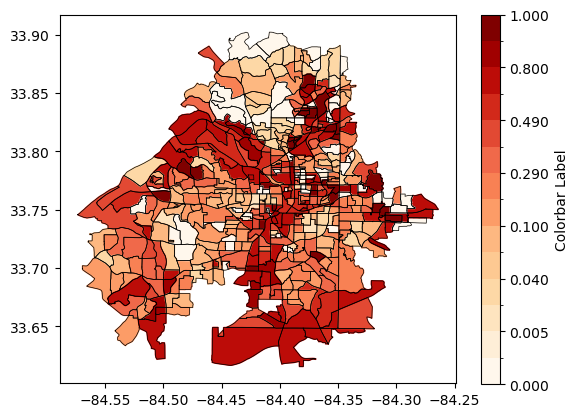

In [8]:
# Import necessary libraries
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

# Define your custom bins for color mapping
bins = [0, 0.0025, 0.005, 0.01, 0.04, 0.05, 0.1, 0.19, 0.29, 0.39, 0.49, 0.6,0.8,0.9,1.0] 

# Create a new figure and axis
fig, ax = plt.subplots()

# Get colormap and normalize it using custom bins
cmap = plt.cm.get_cmap('OrRd')  
norm = mcolors.BoundaryNorm(bins, cmap.N)  # Use BoundaryNorm for custom bins

# Iterate over polygons and associated values
for polygon, LDI_value in zip(polygons, LDI):  
    if isinstance(polygon, MultiPolygon):
        for i in polygon.geoms:
            x, y = i.exterior.xy
            ax.plot(x, y, color='black', linewidth=0.5)  
            ax.fill(x, y, color=cmap(norm(float(LDI_value))))  
    else:
        x, y = polygon.exterior.xy
        ax.plot(x, y, color='black', linewidth=0.5)  
        ax.fill(x, y, color=cmap(norm(float(LDI_value)))) 

# Add colorbar to the plot
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('Colorbar ')  # Set the label for the colorbar

# Set aspect ratio of the plot to equal
ax.set_aspect('equal')

# Display the plot
plt.show()